In [68]:
import pyodbc
import cx_Oracle
from cx_Oracle import connect

import pandas as pd

In [69]:
connection = connect('ML/mltst@SPPMLT')
print(connection.version)

19.0.0.0.0


In [70]:
cur = connection.cursor()
cur.execute('select * from LPD_DATA.LPD_WAFER_DETAIL')
rows = cur.fetchall()

In [71]:
print(type(rows))
print(len(rows))
print(rows[:1])

<class 'list'>
183308
[(4, 62924093, -82286, -48360, 17714, 51640, 95444.62, -2.61026, '.124', None)]


In [72]:
print(cur.description)

[('LPD_ID', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 0), ('WAFER_NUMBER', <cx_Oracle.DbType DB_TYPE_NUMBER>, 39, None, 38, 0, 0), ('RAW_X_COORDINATE', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 0), ('RAW_Y_COORDINATE', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 0), ('X_COORDINATE', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 1), ('Y_COORDINATE', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 1), ('R_VALUE', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 1), ('THETA', <cx_Oracle.DbType DB_TYPE_NUMBER>, 127, None, 0, -127, 1), ('DEFECT_SIZE', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 100, 100, None, None, 1), ('DEFECT_TYPE', <cx_Oracle.DbType DB_TYPE_VARCHAR>, 100, 100, None, None, 1)]


In [73]:
col_names = []
for i in range(0, len(cur.description)):
    col_names.append(cur.description[i][0])
col_names

['LPD_ID', 'WAFER_NUMBER', 'RAW_X_COORDINATE', 'RAW_Y_COORDINATE', 'X_COORDINATE', 'Y_COORDINATE', 'R_VALUE', 'THETA', 'DEFECT_SIZE', 'DEFECT_TYPE']

In [74]:
df = pd.DataFrame(rows, columns=col_names)

In [75]:
df.shape

(183308, 10)

In [76]:
df.head(2)

,LPD_ID,WAFER_NUMBER,RAW_X_COORDINATE,RAW_Y_COORDINATE,X_COORDINATE,Y_COORDINATE,R_VALUE,THETA,DEFECT_SIZE,DEFECT_TYPE
0,4,62924093,-82286,-48360,17714,51640,95444.62,-2.61026,.124,None
1,10,62924743,40682,23310,140682,123310,46886.90,0.52032,.153,None


In [77]:
df['WAFER_NUMBER'].nunique()

742

In [78]:
df.sort_values(by=['WAFER_NUMBER','LPD_ID'], ascending = [True, True],inplace=True)

In [80]:
df.head(2)

,LPD_ID,WAFER_NUMBER,RAW_X_COORDINATE,RAW_Y_COORDINATE,X_COORDINATE,Y_COORDINATE,R_VALUE,THETA,DEFECT_SIZE,DEFECT_TYPE
116772,24,55825127,9900,-86310,109900,13690,86875.92,-1.45659,.106,None
116773,24,55825127,-14916,-75690,85084,24310,77145.73,-1.76537,.132,None


In [47]:
df['DEFECT_TYPE'].value_counts()

Series([], Name: DEFECT_TYPE, dtype: int64)

In [46]:
df['LPD_ID'].value_counts()

25    19560
32    18963
23    17140
26    16528
30    14855
31    14436
28    13428
29    13249
21    12390
22    10978
27    10511
24    10269
33     9244
18      147
12      126
13      117
9       112
20      109
5       108
15      105
10       98
11       95
14       92
19       88
4        88
7        78
3        74
17       69
16       66
2        64
6        48
8        47
1        26
Name: LPD_ID, dtype: int64

In [44]:
df['DEFECT_SIZE'].value_counts()

.100    7858
.098    7058
.111    7049
.113    6725
.116    6146
        ... 
.214       1
.204       1
.233       1
.235       1
.193       1
Name: DEFECT_SIZE, Length: 185, dtype: int64

In [56]:
l = df['DEFECT_TYPE']

l1 = []
 
# taking an counter
count = 0
 
# traversing the array
for item in l:
    if item not in l1:
        count += 1
        l1.append(item)
 
# printing the output
print("No of unique items are:", count)

No of unique items are: 1


In [42]:
df.describe()

,LPD_ID,WAFER_NUMBER,RAW_X_COORDINATE,RAW_Y_COORDINATE,X_COORDINATE,Y_COORDINATE,R_VALUE,THETA
count,183308.000000,1.833080e+05,183308.000000,183308.000000,183308.000000,183308.000000,183308.000000,183308.000000
mean,26.896153,5.589301e+07,-464.460640,-1062.493110,99535.539360,98937.506890,51866.372787,-0.052070
std,3.973995,6.619555e+05,38671.771003,39544.054665,38671.771003,39544.054665,19247.011525,1.807721
min,1.000000,5.582513e+07,-96549.000000,-96600.000000,3451.000000,3400.000000,334.820000,-3.141430
25%,24.000000,5.582562e+07,-30624.000000,-34898.000000,69376.000000,65102.000000,40305.420000,-1.647537
50%,27.000000,5.582595e+07,-554.000000,-1478.000000,99446.000000,98522.000000,51760.540000,-0.076845
75%,30.000000,5.582615e+07,29581.000000,32962.000000,129581.000000,132962.000000,65842.147500,1.512680
max,33.000000,6.296342e+07,96730.000000,97184.000000,196730.000000,197184.000000,99726.250000,3.141590


In [86]:
df[df['WAFER_NUMBER']==55825949]

,LPD_ID,WAFER_NUMBER,RAW_X_COORDINATE,RAW_Y_COORDINATE,X_COORDINATE,Y_COORDINATE,R_VALUE,THETA,DEFECT_SIZE,DEFECT_TYPE
34093,32,55825949,-9346,-76065,90654,23935,76637.01,-1.69305,.108,None
34094,32,55825949,-22414,-75225,77586,24775,78493.24,-1.86038,.123,None
34095,32,55825949,-3168,-73545,96832,26455,73613.20,-1.61385,.127,None
34096,32,55825949,-20513,-72435,79487,27565,75283.55,-1.84676,.101,None
34097,32,55825949,-10138,-71415,89862,28585,72131.00,-1.71181,.119,None
...,...,...,...,...,...,...,...,...,...,...
178803,32,55825949,-73260,-23625,26740,76375,76975.11,-2.82964,.133,None
178816,32,55825949,-82922,-21285,17078,78715,85610.22,-2.89033,.099,None
178817,32,55825949,-36973,-12585,63027,87415,39056.18,-2.81351,.132,None
178818,32,55825949,-23826,4440,76174,104440,24236.17,2.95735,.134,None


In [87]:
df[df['WAFER_NUMBER']==62389743]

,LPD_ID,WAFER_NUMBER,RAW_X_COORDINATE,RAW_Y_COORDINATE,X_COORDINATE,Y_COORDINATE,R_VALUE,THETA,DEFECT_SIZE,DEFECT_TYPE
467,14,62389743,-41709,80558,58291,180558,90715.11,2.04854,.150,None


In [85]:
df['WAFER_NUMBER'].value_counts(0)

55825949    1645
55825963    1596
55825779    1592
55826029    1511
55825783    1501
            ... 
62389745       1
62390645       1
62924047       1
62390649       1
62389743       1
Name: WAFER_NUMBER, Length: 742, dtype: int64

gray <function <lambda> at 0x00000258810A4A60>


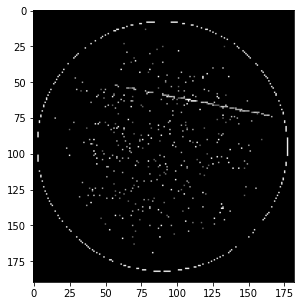

In [14]:
import cv2
import numpy as np
import imageio as iio
from matplotlib import pyplot as plt
pic = iio.imread(r'c:\users\akumar\Downloads\image.png') 
pic = pic[20:210, 48:230, :]
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114])  
print("gray",gray)
gray = gray(pic) 
plt.figure( figsize = (5,5))
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray')) 
plt.show()
rho = 1
theta = np.pi/180
#lines = cv2.HoughLines(gray, rho, theta, 0, 0, 0, np.pi) 

In [12]:
x = [90654.99378204345703, 424.4607162475586, 665.4505157470703, 665.1176452636719]

y = [709.4012403488159, 253.38330745697021, 519.5582628250122, 519.5164632797241]

In [13]:
from matplotlib import pyplot as plt
im = plt.imread(p_transform_path)
implot = plt.imshow(im)
for p,q in zip(x,y):
    x_cord = p # try this change (p and q are already the coordinates)
    y_cord = q
    plt.scatter([x_cord], [y_cord])
plt.show()

NameError: name 'p_transform_path' is not defined

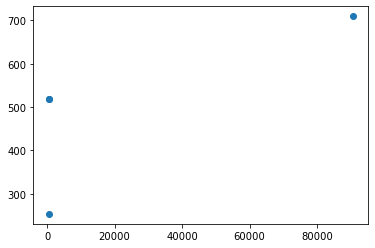

In [14]:
import numpy as np
import matplotlib.pyplot as plt


#x = np.random.rand(N)
#y = np.random.rand(N)

plt.scatter(x, y)
plt.show()